In [1]:
import wandb
import random
import torch
import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


wandb.init(project="my-test-project", group='simple', entity="rhngla")
config = {"learning_rate": 0.001, "epochs": 100, "batch_size": 128}
wandb.config = config

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: rhngla. Use `wandb login --relogin` to force relogin


In [14]:
class DynamicNet(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate five parameters and assign them as members.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        y = self.a + self.b * x + self.c * x ** 2 - self.d * x ** 3
        return y



# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = DynamicNet()

# Optional
wandb.watch(model, log_freq=1, log='all')

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)
for t in range(100):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    print(t, loss.item())
    wandb.log({"loss": loss})

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

wandb.finish()

0 35513.7890625
1 35211.55859375
2 34643.42578125
3 33846.97265625
4 32859.74609375
5 31718.24609375
6 30457.15234375
7 29108.73828125
8 27702.4921875
9 26264.84765625
10 24819.11328125
11 23385.41796875
12 21980.783203125
13 20619.275390625
14 19312.1640625
15 18068.14453125
16 16893.572265625
17 15792.705078125
18 14767.9599609375
19 13820.162109375
20 12948.779296875
21 12152.158203125
22 11427.7216796875
23 10772.18359375
24 10181.7109375
25 9652.0927734375
26 9178.8662109375
27 8757.4453125
28 8383.2236328125
29 8051.65185546875
30 7758.3115234375
31 7498.974609375
32 7269.63525390625
33 7066.5478515625
34 6886.2431640625
35 6725.5439453125
36 6581.5625
37 6451.70703125
38 6333.66455078125
39 6225.3984375
40 6125.130859375
41 6031.3251953125
42 5942.6669921875
43 5858.04931640625
44 5776.548828125
45 5697.40869140625
46 5620.021484375
47 5543.90771484375
48 5468.69921875
49 5394.12646484375
50 5319.99755859375
51 5246.19287109375
52 5172.6455078125
53 5099.3330078125
54 5026.26904

loss,██▇▇▆▅▄▄▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,2627.8125


Result: y = -0.9040217995643616 + 0.9743970632553101 x + -0.0648248940706253 x^2 + -0.10970024019479752 x^3


AttributeError: 'NoneType' object has no attribute '_log'

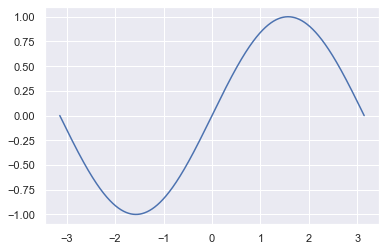

In [16]:
plt.plot(x.numpy(),y.numpy(), 'b')
plt.plot(x.numpy(),model(x).detach().numpy(), 'r')
plt.show()

In [19]:
type(model)

__main__.DynamicNet